In [1]:
import numpy as np
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
loss_functions = ["NCC", "Grad", "Seg"]
filepath = "../runs/prelim_experiments/hv_khead_vm_learning_07082023_110305/fold0/run0/test/im0.npz"
data = np.load(filepath)
mo_obj_val = np.squeeze(data["losses"]).T
print(mo_obj_val.shape)

In [ ]:
cmap = plt.cm.get_cmap('tab20', 20)
fig = plt.figure(figsize=(15,10), dpi=100)
view_list = [(30, -60, 0),
             (30, -30, 0),
             (60, -60, 0)] #elevation, azimuth, and roll

for i, view_angles in enumerate(view_list):
    elev, azim, roll = view_angles
    
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    n_obj, n_sol = mo_obj_val.shape
    if i==1:
        for i_sol in range(n_sol):
            ax.scatter(mo_obj_val[0,i_sol], mo_obj_val[1,i_sol], mo_obj_val[2,i_sol], 
                        color=cmap(i_sol),
                        label=f"Pred{i_sol}")
                
        ax.legend(loc="upper center", ncols=n_sol, bbox_to_anchor=(-0.5, 0.15, 2, 1))
    else:
        for i_sol in range(n_sol):
            ax.scatter(mo_obj_val[0,i_sol], mo_obj_val[1,i_sol], mo_obj_val[2,i_sol], 
                    color=cmap(i_sol))
    
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_xlabel(loss_functions[0])
    ax.set_ylabel(loss_functions[1])
    ax.set_zlabel(loss_functions[2])
    # ax.set_title("Pareto front approximation")
    ax.view_init(elev, azim, roll)

plt.subplots_adjust(wspace=0.2)
plt.show()

In [ ]:
axis_limits = [*ax.get_xlim(), *ax.get_ylim(), *ax.get_zlim()]

In [61]:
print(np.exp(-1.92), np.log2(5))

0.14660696213035013 2.321928094887362


6614.247752848375 0.0


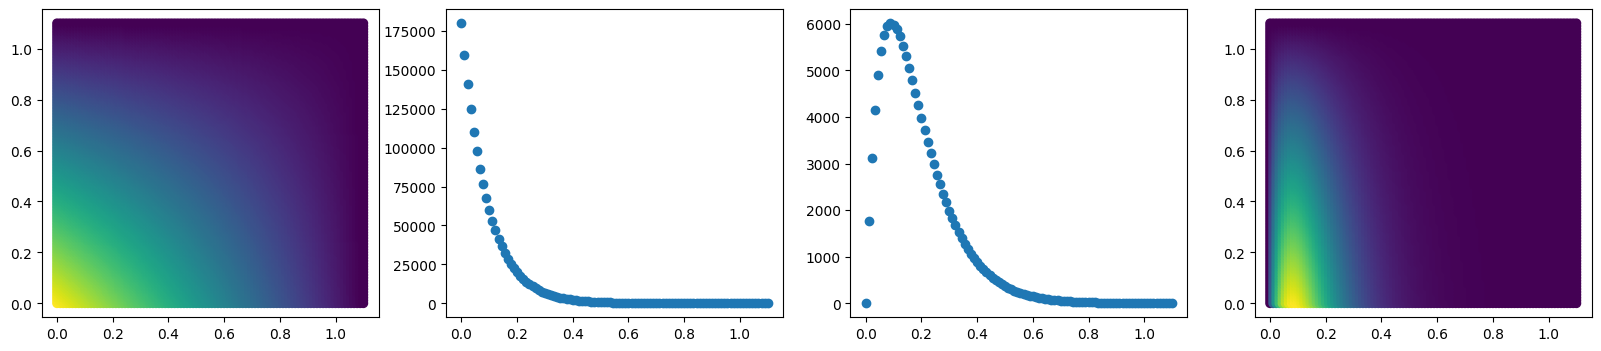

In [164]:
ref_point = (1.1, 1.1)
x = np.linspace(0, ref_point[0], 100)
y = np.linspace(0, ref_point[1], 100)
X, Y = np.meshgrid(x, y, indexing="ij")

gamma_x = 1
WX = np.exp((ref_point[0] - gamma_x*X)/0.1*ref_point[0])
WY = 1

weighted_X = WX * X
weighted_Y = WY * Y

hv = np.abs(ref_point[0] - X) * np.abs(ref_point[1] - Y)
weighted_hv = np.abs(ref_point[0] - weighted_X) * np.abs(ref_point[1] - weighted_Y)
print(np.max(weighted_hv), np.min(weighted_hv))

wx = np.exp((ref_point[0] - gamma_x*x)/0.1*ref_point[0])
x_new = wx * x
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(141)
ax.scatter(X, Y, c=hv, cmap='viridis')

ax = fig.add_subplot(142)
ax.scatter(x, wx)
ax = fig.add_subplot(143)
ax.scatter(x, x_new)

# grad_wx = -gamma_x * x * np.exp(-gamma_x * x) + np.exp(-gamma_x * x)
ax = fig.add_subplot(144)
ax.scatter(X, Y, c=weighted_hv, cmap='viridis')


1.0 0.0


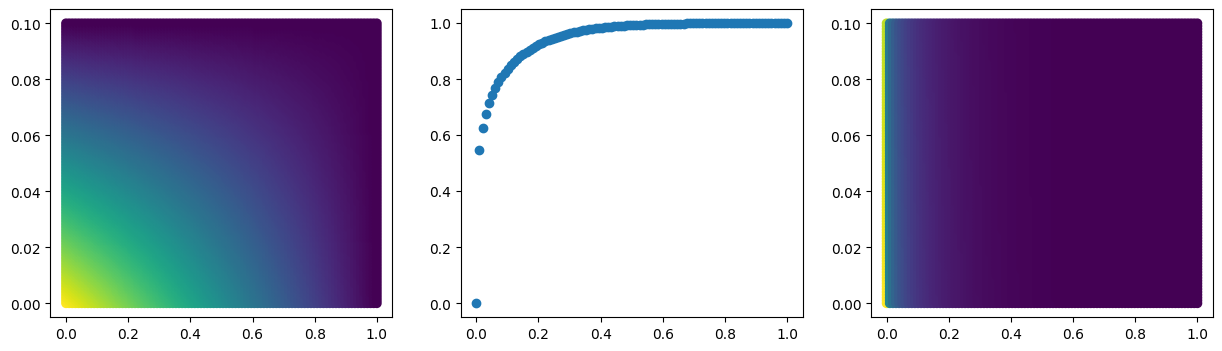

In [241]:
ref_point = (1, 0.1)
x = np.linspace(0, ref_point[0], 100)
y = np.linspace(0, ref_point[1], 100)
X, Y = np.meshgrid(x, y, indexing="ij")

gamma_x = 5
gamma_y = 1
weighted_X = np.power(ref_point[0]**gamma_x - (ref_point[0] - X)**gamma_x, 1/gamma_x)
weighted_Y = Y
hv = np.abs(ref_point[0] - X) * np.abs(ref_point[1] - Y)
weighted_hv = np.abs(ref_point[0] - weighted_X) * np.abs(ref_point[0] - weighted_Y)
print(np.max(weighted_hv), np.min(weighted_hv))

x_new = np.power(ref_point[0]**gamma_x - (ref_point[0] - x)**gamma_x, 1/gamma_x)
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
ax.scatter(X, Y, c=hv, cmap='viridis')

ax = fig.add_subplot(132)
ax.scatter(x, x_new)

ax = fig.add_subplot(133)
ax.scatter(X, Y, c=weighted_hv, cmap='viridis')

10.0 0.0


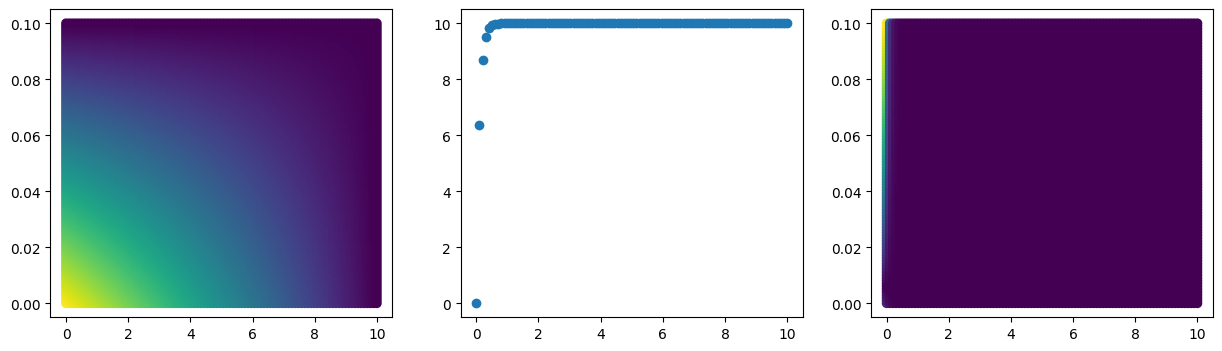

In [237]:
ref_point = (10, 0.1)
x = np.linspace(0, ref_point[0], 100)
y = np.linspace(0, ref_point[1], 100)
X, Y = np.meshgrid(x, y, indexing="ij")

gamma_x = 10
weighted_X = ref_point[0] - ( np.exp(gamma_x * (1 - X)) / np.exp(gamma_x) ) * ref_point[0]
hv = np.abs(ref_point[0] - X) * np.abs(ref_point[1] - Y)
weighted_hv = np.abs(ref_point[0] - weighted_X) * np.abs(ref_point[1] - weighted_Y)
print(np.max(weighted_hv), np.min(weighted_hv))

x_new = ref_point[0] - ( np.exp(gamma_x * (1 - x)) / np.exp(gamma_x) ) * ref_point[0]
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
ax.scatter(X, Y, c=hv, cmap='viridis')

ax = fig.add_subplot(132)
ax.scatter(x, x_new)

ax = fig.add_subplot(133)
ax.scatter(X, Y, c=weighted_hv, cmap='viridis')

In [175]:
z = ref_point[0] - (1 - 0)**gamma_x
z

0.10000000000000009

In [ ]:
# creating 3d plot using matplotlib
# in python

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
# for creating a responsive plot
%matplotlib widget
 
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
 
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
 
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2,
      3, 4, 5, 6, 7, 8, 9, 0]
 
# creating figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')
 
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
 
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()